In [ ]:
'''
    Le lien
'''
https://developers.synopticdata.com/about/station-variables/

In [1]:
'''
    Les imports
'''
import requests, os
import matplotlib.pyplot as plt

In [2]:
def requete(station_id="KLAX", start = "", stop = "", **arg_secondaires):
    
    API_TOKEN = "d48d78ccfbc04fc397146217412d13c2"
    API_ROOT = "https://api.synopticdata.com/v2/"
    
    if start == "" and stop == "" :
        type_requete = "stations/latest"
        api_arguments = {"token":API_TOKEN,"stid":station_id}
    else :
        type_requete = "stations/timeseries"
        api_arguments = {"token":API_TOKEN,"stid":station_id, "start":start,"end":stop}
    
    for key, val in arg_secondaires.items():
        api_arguments[key] = val
    
    api_request_url = os.path.join(API_ROOT, type_requete)
    
    return requests.get(api_request_url, params=api_arguments).json()
    

In [3]:
def date(annee, mois, jour, heure, minute):    
    if minute == 0 : 
        return int(str(annee) + str(mois) + str(jour) + str(heure) + '00')
    else :
         return int(str(annee) + str(mois) + str(jour) + str(heure) + str(minute))

In [15]:
def plot(data):
    wind = x["STATION"][0]["OBSERVATIONS"]["wind_speed_set_1"]
    date = x["STATION"][0]["OBSERVATIONS"]["date_time"]
    plt.figure()
    plt.plot(date, wind)
    
    plt.xlabel("date")
    plt.ylabel("m/s")
    
    plt.show()

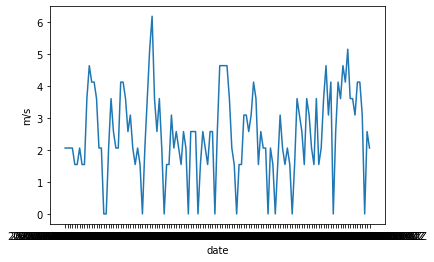

In [16]:
start = date(2020,12,20,10,00)
stop = date(2020,12,25,10,00)
stat_id = "KLAX"
x = requete(station_id = stat_id, start = start, stop = stop, units = "metric")
if x["SUMMARY"]["RESPONSE_MESSAGE"] == "OK":
    plot(x)